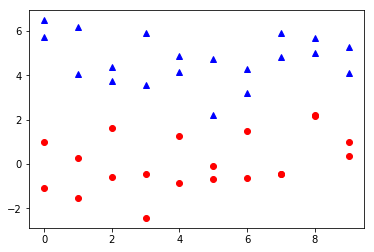

weight :  [2.14037745 1.2763927 ]
bias :  -9

Test:
0
1


In [17]:
# Simple Perceptron
import numpy as np

rng = np.random.RandomState(123) # 매번 동일한 램덤 상태의 값을 형성해 동일한 조건 하에서 결과를 비교 및 평가를 수행

d = 2 # 데이터 차원
N = 10 # 각 패터마다의 데이터 수
mean = 5 # 뉴런이 발화하는 데이터의 평균값

x1 = rng.randn(N,d) + np.array([0,0])
x2 = rng.randn(N,d) + np.array([mean, mean])
x = np.concatenate((x1,x2), axis=0)

import matplotlib.pyplot as plt
plt.plot(x1, 'ro', x2, 'b^')
plt.show()

w = np.zeros(d) #weight
b = 0 # bias

# y = f(w^Tx + b) 정의
def y(x):
    return step(np.dot(w,x) + b)

def step(x):
    return 1 * (x > 0)

#파라미터를 계속 갱신하기 위해서 사용
def t(i):
    if i<N: # N개의 발화하지 않는 데이터 x1
        return 0
    else: # 발화하는 데이터 x2
        return 1
    
while True:
    #파라미터 갱신 처리
    classified = True
    for i in range(N*2):
        delta_w = (t(i)-y(x[i])) * x[i]
        delta_b = (t(i)-y(x[i]))
        w += delta_w # weight 업데이트
        b += delta_b # bias 업데이트
        classified *= all(delta_w == 0) * (delta_b==0)
    if classified: #모든 데이터가 제대로 분류될 때 while문을 빠져나옴
        break
        
        
print('weight : ',w)
print('bias : ', b)

print('\nTest:')
print(y([0, 0]))  # => 0
print(y([5, 5]))  # => 1
        

In [74]:
# AND OR NOT with Keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 모델 계층 구조 방법 1
model_method1 = Sequential([
    Dense(input_dim=1, units=1), # 입력차원 = 2, 출력 차원 = 1 : w1x1 + w2x2 + b
    Activation('sigmoid')
])
# 모델 계층 구조 방법 2
model_method2 = Sequential()
model_method2.add(Dense(input_dim=2, units=1))
model_method2.add(Activation('sigmoid'))

# 모델 계층 구조 방법 2 (model_method2) 사용
lr = 0.1 # learning rate
model_method1.compile(loss='binary_crossentropy', optimizer=SGD(lr=lr))
model_method2.compile(loss='binary_crossentropy', optimizer=SGD(lr=lr))


# ----------------------------OR------------------------------------------
print('-------------------------------------- OR --------------------------------------')
X_OR = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_OR = np.array([[0], [1], [1], [1]])
epochs = 200
batch_size = 1
model_method2.fit(X_OR,Y_OR, epochs=epochs, batch_size = batch_size)
classes = model_method2.predict_classes(X_OR, batch_size=batch_size)
prob = model_method2.predict_proba(X_OR, batch_size=batch_size)

# 결과 확인
print('classified: ')
print(Y_OR == classes)
print()
print('output probability: ')
print(prob)
# ----------------------------AND-----------------------------------------
print('-------------------------------------- AND -------------------------------------')
X_AND = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_AND = np.array([[0], [0], [0], [1]])

model_method2.fit(X_AND,Y_AND, epochs=epochs, batch_size = batch_size)
classes = model_method2.predict_classes(X_AND, batch_size=batch_size)
prob = model_method2.predict_proba(X_AND, batch_size=batch_size)

# 결과 확인

print('classified: ')
print(Y_AND == classes)
print()
print('output probability: ')
print(prob)

# ----------------------------NOT-----------------------------------------
print('-------------------------------------- NOT -------------------------------------')
X_NOT = np.array([[0], [1]])
Y_NOT = np.array([[1], [0]])

model_method1.fit(X_NOT,Y_NOT, epochs=epochs, batch_size = batch_size)
classes = model_method1.predict_classes(X_NOT, batch_size=batch_size)
prob = model_method1.predict_proba(X_NOT, batch_size=batch_size)

# 결과 확인
print('classified: ')
print(Y_NOT == classes)
print()
print('output probability: ')
print(prob)

-------------------------------------- OR --------------------------------------
Epoch 1/200
4/4 [==============================] - 1s 139ms/step - loss: 0.5234
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4937
Epoch 3/200
4/4 [==============================] - 0s 992us/step - loss: 0.4714
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4522
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4366
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4238
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4037
Epoch 9/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3880
Epoch 11/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 12/200
4/4 [==============================] - 0s 

In [73]:
# AND OR NOT with Keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# 모델 계층 (AND & OR)
model_AND_OR = Sequential()
model_AND_OR.add(Dense(input_dim=2, units=1))
model_AND_OR.add(Activation('sigmoid'))

# 모델 계층 (NOT)
model_NOT = Sequential()
model_NOT.add(Dense(input_dim=1, units=1))
model_NOT.add(Activation('sigmoid'))

lr = 0.1 # learning rate
model_AND_OR.compile(loss='binary_crossentropy', optimizer=SGD(lr=lr))
model_NOT.compile(loss='binary_crossentropy', optimizer=SGD(lr=lr))

X1 = np.array([[[0,0], [0,1], [1,0], [1,1]],  # AND
                 [[0,0], [0,1], [1,0], [1,1]]]) # OR
Y1 = np.array([[[0], [0], [0], [1]], # AND 
              [[0], [1], [1], [1]]]) # OR 
X2 = np.array([[0], [1]])
Y2 = np.array([[1], [0]])

epochs = 200
batch_size = 1
for i in range(3):
    if i < 2:
        model_AND_OR.fit(X1[i],Y1[i], epochs=epochs, batch_size = batch_size)
        classes1[i] = model_AND_OR.predict_classes(X1[i], batch_size=batch_size)
        prob = model_AND_OR.predict_proba(X1[i], batch_size=batch_size)
    else:
        model_NOT.fit(X2,Y2, epochs=epochs, batch_size = batch_size)
        classes2 = model_NOT.predict_classes(X2, batch_size=batch_size)
        prob = model_NOT.predict_proba(X2, batch_size=batch_size)
        
        
# 결과 확인
name = ['AND', 'OR', 'NOT']
for i in name:
    print(i)


Epoch 1/200
4/4 [==============================] - 1s 133ms/step - loss: 0.7848
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7280
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6831
Epoch 4/200
4/4 [==============================] - 0s 997us/step - loss: 0.6497
Epoch 5/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6222
Epoch 6/200
4/4 [==============================] - 0s 997us/step - loss: 0.6006
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5837
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5678
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5550
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5438
Epoch 11/200
4/4 [==============================] - 0s 997us/step - loss: 0.5340
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5247
Epoch 13/200
4/4 [==============================] - 0

ValueError: could not broadcast input array from shape (4,1) into shape (1)

In [68]:
X_OR = np.array([[[0,0], [0,1], [1,0], [1,1]], 
                 [[0,0], [0,1], [1,0], [1,1]]])
Y_OR = np.array([[0], [1], [1], [1]])
print(X_OR)
X1 = np.array([[[0,0], [0,1], [1,0], [1,1]],  # AND
                 [[0,0], [0,1], [1,0], [1,1]]]) # OR
Y1 = np.array([[[0], [0], [0], [1]], # AND 
              [[0], [1], [1], [1]]]) # OR 
X2 = np.array([[0], [1]])
Y2 = np.array([[1], [0]])



[[[0 0]
  [0 1]
  [1 0]
  [1 1]]

 [[0 0]
  [0 1]
  [1 0]
  [1 1]]]

[0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1]
